In [ ]:
!pip install -Uqq fastai
from fastai.vision.all import *


In [ ]:
path=untar_data(URLs.FOOD)

In [ ]:
get_image_files(path)

(#101000) [Path('/root/.fastai/data/food-101/images/cannoli/2750933.jpg'),Path('/root/.fastai/data/food-101/images/cannoli/2742312.jpg'),Path('/root/.fastai/data/food-101/images/cannoli/3163571.jpg'),Path('/root/.fastai/data/food-101/images/cannoli/604055.jpg'),Path('/root/.fastai/data/food-101/images/cannoli/2938083.jpg'),Path('/root/.fastai/data/food-101/images/cannoli/591501.jpg'),Path('/root/.fastai/data/food-101/images/cannoli/389038.jpg'),Path('/root/.fastai/data/food-101/images/cannoli/1561749.jpg'),Path('/root/.fastai/data/food-101/images/cannoli/2191429.jpg'),Path('/root/.fastai/data/food-101/images/cannoli/2990354.jpg')...]

<Axes: >

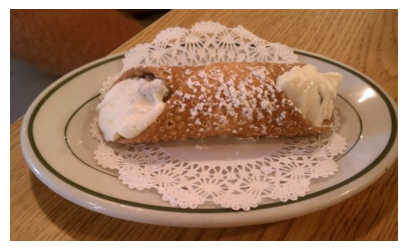

In [ ]:
img=PILImage.create(get_image_files(path)[13])
img.show()

In [ ]:
len(get_image_files(path))

101000

In [ ]:
pd.read_json('/root/.fastai/data/food-101/test.json')
# the data is already split into training and testing

pd.read_json('/root/.fastai/data/food-101/train.json')

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,...,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,...,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/1016791,hot_and_sour_soup/1008185,samosa/101365,sashimi/1002556,pork_chop/1019530,spring_rolls/1003507,panna_cotta/1011097,beef_tartare/1009672,greek_salad/1010520,foie_gras/1011711,...,chicken_quesadilla/1011413,pho/1012513,prime_rib/100945,cheesecake/1004807,ice_cream/102595,omelette/1015300,grilled_cheese_sandwich/1007544,lobster_roll_sandwich/100646,nachos/1011394,oysters/1023832
3,churros/102100,hot_and_sour_soup/1008701,samosa/1015943,sashimi/1007253,pork_chop/1019569,spring_rolls/1008736,panna_cotta/1013000,beef_tartare/1012128,greek_salad/1011665,foie_gras/1017233,...,chicken_quesadilla/1023828,pho/1019401,prime_rib/10120,cheesecake/1017408,ice_cream/1044117,omelette/1029915,grilled_cheese_sandwich/1013343,lobster_roll_sandwich/100655,nachos/1013641,oysters/103236
4,churros/1025494,hot_and_sour_soup/1008924,samosa/1016296,sashimi/1010510,pork_chop/1025391,spring_rolls/1012525,panna_cotta/1020036,beef_tartare/1027680,greek_salad/1012989,foie_gras/1023512,...,chicken_quesadilla/1024740,pho/1021371,prime_rib/1016126,cheesecake/1021942,ice_cream/104465,omelette/1038109,grilled_cheese_sandwich/1016030,lobster_roll_sandwich/100702,nachos/1014846,oysters/1038150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,churros/977938,hot_and_sour_soup/983606,samosa/987023,sashimi/98340,pork_chop/968836,spring_rolls/989498,panna_cotta/971492,beef_tartare/97708,greek_salad/986206,foie_gras/950701,...,chicken_quesadilla/992658,pho/969401,prime_rib/992983,cheesecake/952846,ice_cream/978261,omelette/966004,grilled_cheese_sandwich/981992,lobster_roll_sandwich/982053,nachos/99074,oysters/982030
746,churros/978170,hot_and_sour_soup/991636,samosa/989842,sashimi/987088,pork_chop/96943,spring_rolls/995483,panna_cotta/972152,beef_tartare/987587,greek_salad/994568,foie_gras/952007,...,chicken_quesadilla/993661,pho/981313,prime_rib/993496,cheesecake/958209,ice_cream/978988,omelette/968330,grilled_cheese_sandwich/986899,lobster_roll_sandwich/987229,nachos/99076,oysters/98268
747,churros/98227,hot_and_sour_soup/993036,samosa/991952,sashimi/987318,pork_chop/970362,spring_rolls/996700,panna_cotta/973687,beef_tartare/987926,greek_salad/995049,foie_gras/976580,...,chicken_quesadilla/993767,pho/988049,prime_rib/996023,cheesecake/971470,ice_cream/987631,omelette/979474,grilled_cheese_sandwich/987731,lobster_roll_sandwich/990202,nachos/99087,oysters/98313
748,churros/993534,hot_and_sour_soup/997881,samosa/992201,sashimi/993162,pork_chop/99168,spring_rolls/998226,panna_cotta/97774,beef_tartare/999120,greek_salad/99676,foie_gras/978439,...,chicken_quesadilla/997377,pho/998863,prime_rib/998348,cheesecake/983639,ice_cream/988684,omelette/981323,grilled_cheese_sandwich/997050,lobster_roll_sandwich/99754,nachos/992029,oysters/990299


In [ ]:
# choosing what we want to classify
label1='samosa'
label2='churros'

Data preparartion

In [ ]:
for img in get_image_files(path):
  if label1 in str(img):
    img.rename(f"{img.parent}/{label1}_{img.name}")
  elif label2 in str(img):
    img.rename(f"{img.parent}/{label2}_{img.name}")
  else:os.remove(img) #removing the other images from the dataset
len(get_image_files(path))

2000

training the model

In [ ]:
def getlabel(fileName):
  return fileName.split('_')[0]

getlabel("churros_56.jpg") #testing


'churros'

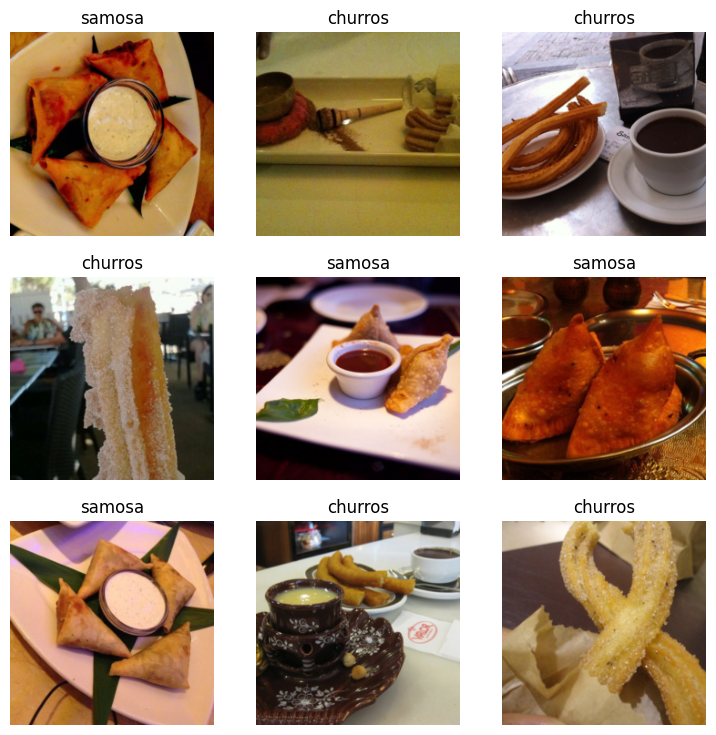

In [ ]:
dls=ImageDataLoaders.from_name_func(
    path,get_image_files(path),valid_pct=0.2,seed=421,#0.2 is twenty percent of the data for testing
    label_func=getlabel,item_tfms=Resize(224)
)

dls.valid.show_batch()

In [ ]:
learn=cnn_learner(dls,resnet34,metrics=error_rate,pretrained=True)
learn.fine_tune(epochs=10)

epoch,train_loss,valid_loss,error_rate,time
0,0.497882,0.081951,0.030000,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.114741,0.049620,0.017500,00:14
1,0.070139,0.070756,0.025000,00:13
2,0.052617,0.043787,0.010000,00:13
3,0.049463,0.051994,0.017500,00:14
4,0.048030,0.094772,0.027500,00:16
5,0.033776,0.041843,0.010000,00:13
6,0.022842,0.027338,0.007500,00:14
7,0.016812,0.028495,0.007500,00:14
8,0.011063,0.026400,0.005000,00:14
9,0.007899,0.024335,0.005000,00:13


testing the model by upploading an image on our own

Saving 61050397 (1).jpeg to 61050397 (1) (1).jpeg


This is a samosa.
samosa1.000000
churros0.000000


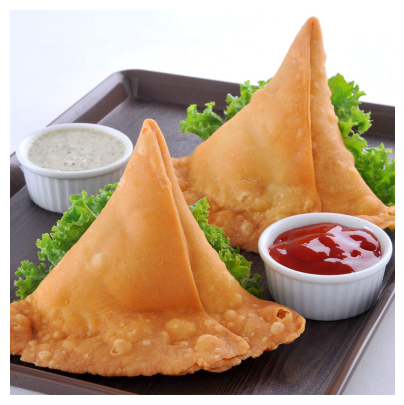

In [ ]:
from google.colab import files
uploader=files.upload()
for img in uploader.items():
  uploadingImg=img[0]

img=PILImage.create(uploadingImg)
img.show()

label,_,probs=learn.predict(img)

print(f"This is a {label}.")
print(f"{label1}{probs[1].item():6f}")
print(f"{label2}{probs[0].item():6f}")

Saving OIP.jpeg to OIP (1).jpeg


This is a churros.
samosa0.000000
churros1.000000


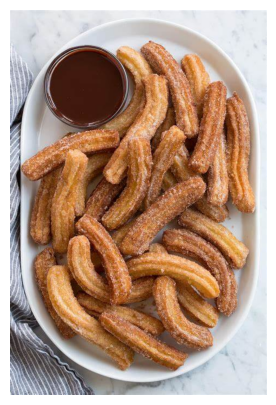

In [ ]:
from google.colab import files
uploader=files.upload()
for img in uploader.items():
  uploadingImg=img[0]

img=PILImage.create(uploadingImg)
img.show()

label,_,probs=learn.predict(img)

print(f"This is a {label}.")
print(f"{label1}{probs[1].item():6f}")
print(f"{label2}{probs[0].item():6f}")

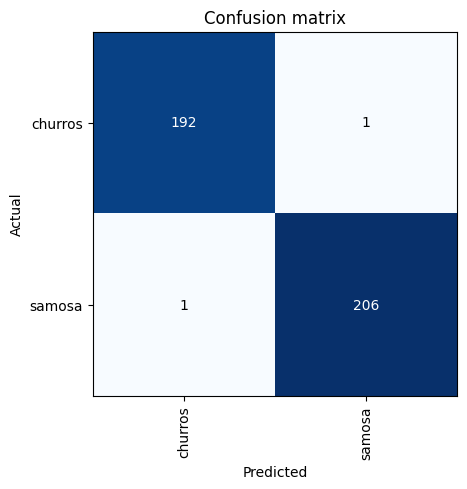

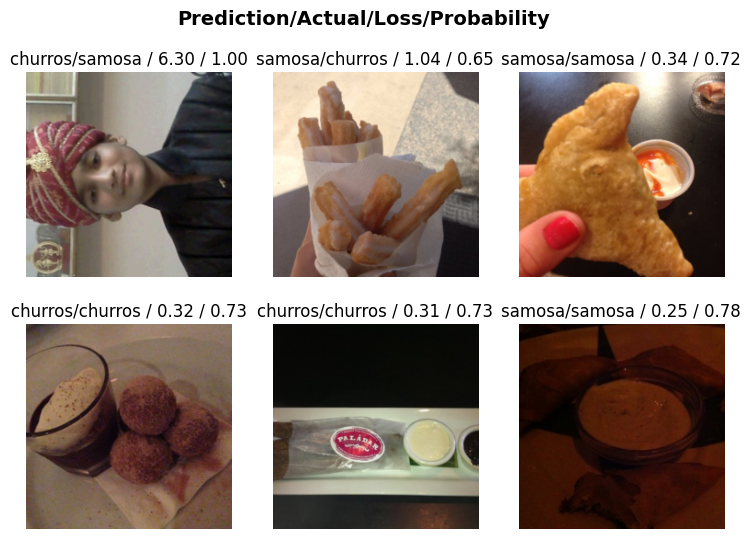

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6)

In [ ]:
learn.export()

In [ ]:
modelPath=get_files(path,'.pkl')[0]
modelPath

Path('/root/.fastai/data/food-101/export.pkl')

In [ ]:
import matplotlib.image as mpimg

learn_inf=load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(path)[0]))


('samosa', tensor(1), tensor([1.1680e-07, 1.0000e+00]))

In [ ]:
learn_inf.dls.vocab

['churros', 'samosa']

In [ ]:
from google.colab import files
files.download(modelPath)#download files from the Colab environment to your local machine